In [1]:
import numpy as np
import copy
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import seed
np.random.seed(2095)

In [2]:
data = pd.read_excel('CardiacPrediction.xlsx')

In [3]:
data.drop(['SEQN','Annual-Family-Income','Height','Ratio-Family-Income-Poverty','X60-sec-pulse',
          'Health-Insurance','Glucose','Vigorous-work','Total-Cholesterol','CoronaryHeartDisease','Blood-Rel-Stroke','Red-Cell-Distribution-Width','Triglycerides','Mean-Platelet-Vol','Platelet-count','Lymphocyte','Monocyte','Eosinophils','Mean-cell-Hemoglobin','White-Blood-Cells','Red-Blood-Cells','Basophils','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.','Hematocrit','Segmented-Neutrophils'], axis = 1, inplace=True)

In [4]:
data.shape

(37079, 25)

In [5]:
data['Diabetes'].loc[(data['Diabetes'] == 3 )] = 1

C:\Users\DELL\AppData\Local\Temp\ipykernel_9196\3794381626.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Diabetes'].loc[(data['Diabetes'] == 3 )] = 1
C:\Users\DELL\AppData\Local\Temp\ipykernel_9196\3794381626.py:1: SettingWithCop

In [6]:
data["Diabetes"].value_counts()

Diabetes
2    32227
1     4852
Name: count, dtype: int64

In [7]:
data["Diabetes"].describe()

count    37079.000000
mean         1.869144
std          0.337247
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Diabetes, dtype: float64

In [8]:
data.columns

Index(['Gender(1=male) ', 'Age', 'Systolic', 'Diastolic', 'Weight',
       'Body-Mass-Index', 'Hemoglobin', 'Albumin', 'ALP', 'AST', 'ALT',
       'Cholesterol', 'Creatinine', 'GGT', 'Iron', 'LDH', 'Phosphorus',
       'Bilirubin', 'Protein', 'Uric.Acid', 'HDL', 'Glycohemoglobin',
       'Moderate-work', 'Blood-Rel-Diabetes(1=yes)', 'Diabetes'],
      dtype='object')

In [9]:
data = data[['Gender(1=male) ', 'Age', 'Systolic', 'Diastolic', 'Weight', 'Body-Mass-Index',
       'Hemoglobin', 'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol',
       'Creatinine', 'GGT', 'Iron', 'LDH', 'Phosphorus',
       'Bilirubin', 'Protein', 'Uric.Acid', 'HDL',
       'Glycohemoglobin', 'Moderate-work',
       'Blood-Rel-Diabetes(1=yes)', 'Diabetes']]

In [10]:
data.isnull().sum()

Gender(1=male)               0
Age                          0
Systolic                     0
Diastolic                    0
Weight                       0
Body-Mass-Index              0
Hemoglobin                   0
Albumin                      0
ALP                          0
AST                          0
ALT                          0
Cholesterol                  0
Creatinine                   0
GGT                          0
Iron                         0
LDH                          0
Phosphorus                   0
Bilirubin                    0
Protein                      0
Uric.Acid                    0
HDL                          0
Glycohemoglobin              0
Moderate-work                0
Blood-Rel-Diabetes(1=yes)    0
Diabetes                     0
dtype: int64

In [11]:
data.describe()

,Gender(1=male),Age,Systolic,Diastolic,Weight,Body-Mass-Index,Hemoglobin,Albumin,ALP,AST,...,LDH,Phosphorus,Bilirubin,Protein,Uric.Acid,HDL,Glycohemoglobin,Moderate-work,Blood-Rel-Diabetes(1=yes),Diabetes
count,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,...,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000
mean,1.513282,48.943661,124.090078,69.919253,80.988276,28.824588,14.139073,42.528116,70.789611,25.722511,...,132.045632,1.203049,11.801173,72.050158,321.723326,1.370344,5.676496,1.598856,1.549502,1.869144
std,0.499830,18.010440,19.254741,13.575804,20.678734,6.608982,1.541599,3.585254,26.073559,19.695625,...,31.961662,0.182223,5.276652,4.967992,86.129723,0.415985,1.050223,0.511199,0.497550,0.337247
min,1.000000,20.000000,0.000000,0.000000,32.300000,13.180000,5.800000,19.000000,7.000000,7.000000,...,4.000000,0.484000,0.000000,47.000000,23.800000,0.160000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,33.000000,111.000000,62.000000,66.500000,24.220000,13.100000,40.000000,55.000000,19.000000,...,113.000000,1.098000,8.550000,69.000000,261.700000,1.070000,5.200000,1.000000,1.000000,2.000000
50%,2.000000,48.000000,121.000000,70.000000,78.200000,27.800000,14.100000,43.000000,67.000000,23.000000,...,128.000000,1.195000,10.260000,72.000000,315.200000,1.290000,5.400000,2.000000,2.000000,2.000000
75%,2.000000,63.000000,134.000000,78.000000,92.100000,32.100000,15.200000,45.000000,82.000000,27.000000,...,146.000000,1.324000,13.680000,75.000000,374.700000,1.600000,5.800000,2.000000,2.000000,2.000000
max,2.000000,85.000000,270.000000,132.000000,371.000000,130.210000,19.700000,57.000000,729.000000,1672.000000,...,1539.000000,2.648000,224.010000,113.000000,1070.600000,5.840000,18.800000,3.000000,2.000000,2.000000


In [12]:
data.shape

(37079, 25)

In [13]:
data['Diabetes'].describe()

count    37079.000000
mean         1.869144
std          0.337247
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Diabetes, dtype: float64

In [14]:
data.columns

Index(['Gender(1=male) ', 'Age', 'Systolic', 'Diastolic', 'Weight',
       'Body-Mass-Index', 'Hemoglobin', 'Albumin', 'ALP', 'AST', 'ALT',
       'Cholesterol', 'Creatinine', 'GGT', 'Iron', 'LDH', 'Phosphorus',
       'Bilirubin', 'Protein', 'Uric.Acid', 'HDL', 'Glycohemoglobin',
       'Moderate-work', 'Blood-Rel-Diabetes(1=yes)', 'Diabetes'],
      dtype='object')

<Axes: ylabel='Diabetes'>

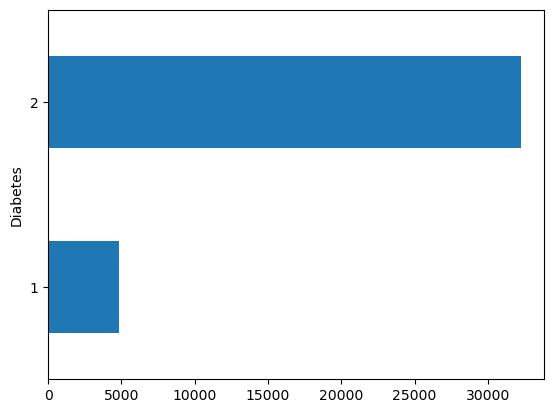

In [15]:
data["Diabetes"].value_counts().sort_index().plot.barh()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37079 entries, 0 to 37078
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender(1=male)             37079 non-null  int64  
 1   Age                        37079 non-null  int64  
 2   Systolic                   37079 non-null  int64  
 3   Diastolic                  37079 non-null  int64  
 4   Weight                     37079 non-null  float64
 5   Body-Mass-Index            37079 non-null  float64
 6   Hemoglobin                 37079 non-null  float64
 7   Albumin                    37079 non-null  int64  
 8   ALP                        37079 non-null  int64  
 9   AST                        37079 non-null  int64  
 10  ALT                        37079 non-null  int64  
 11  Cholesterol                37079 non-null  float64
 12  Creatinine                 37079 non-null  float64
 13  GGT                        37079 non-null  int

In [17]:
data = data.astype(float)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37079 entries, 0 to 37078
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender(1=male)             37079 non-null  float64
 1   Age                        37079 non-null  float64
 2   Systolic                   37079 non-null  float64
 3   Diastolic                  37079 non-null  float64
 4   Weight                     37079 non-null  float64
 5   Body-Mass-Index            37079 non-null  float64
 6   Hemoglobin                 37079 non-null  float64
 7   Albumin                    37079 non-null  float64
 8   ALP                        37079 non-null  float64
 9   AST                        37079 non-null  float64
 10  ALT                        37079 non-null  float64
 11  Cholesterol                37079 non-null  float64
 12  Creatinine                 37079 non-null  float64
 13  GGT                        37079 non-null  flo

<Axes: >

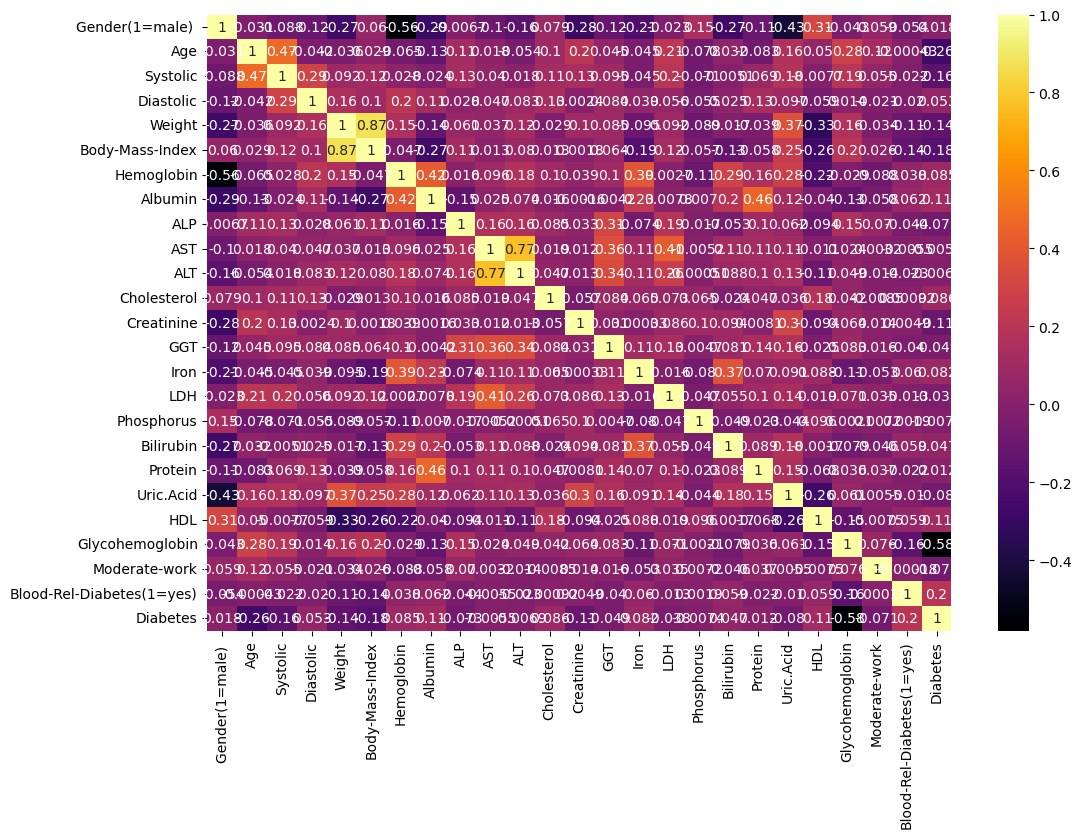

In [19]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(),cmap='inferno', annot=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(1, 0, 'Gender(1=male) '),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Systolic'),
  Text(4, 0, 'Diastolic'),
  Text(5, 0, 'Weight'),
  Text(6, 0, 'Body-Mass-Index'),
  Text(7, 0, 'Hemoglobin'),
  Text(8, 0, 'Albumin'),
  Text(9, 0, 'ALP'),
  Text(10, 0, 'AST'),
  Text(11, 0, 'ALT'),
  Text(12, 0, 'Cholesterol'),
  Text(13, 0, 'Creatinine'),
  Text(14, 0, 'GGT'),
  Text(15, 0, 'Iron'),
  Text(16, 0, 'LDH'),
  Text(17, 0, 'Phosphorus'),
  Text(18, 0, 'Bilirubin'),
  Text(19, 0, 'Protein'),
  Text(20, 0, 'Uric.Acid'),
  Text(21, 0, 'HDL'),
  Text(22, 0, 'Glycohemoglobin'),
  Text(23, 0, 'Moderate-work'),
  Text(24, 0, 'Blood-Rel-Diabetes(1=yes)'),
  Text(25, 0, 'Diabetes')])

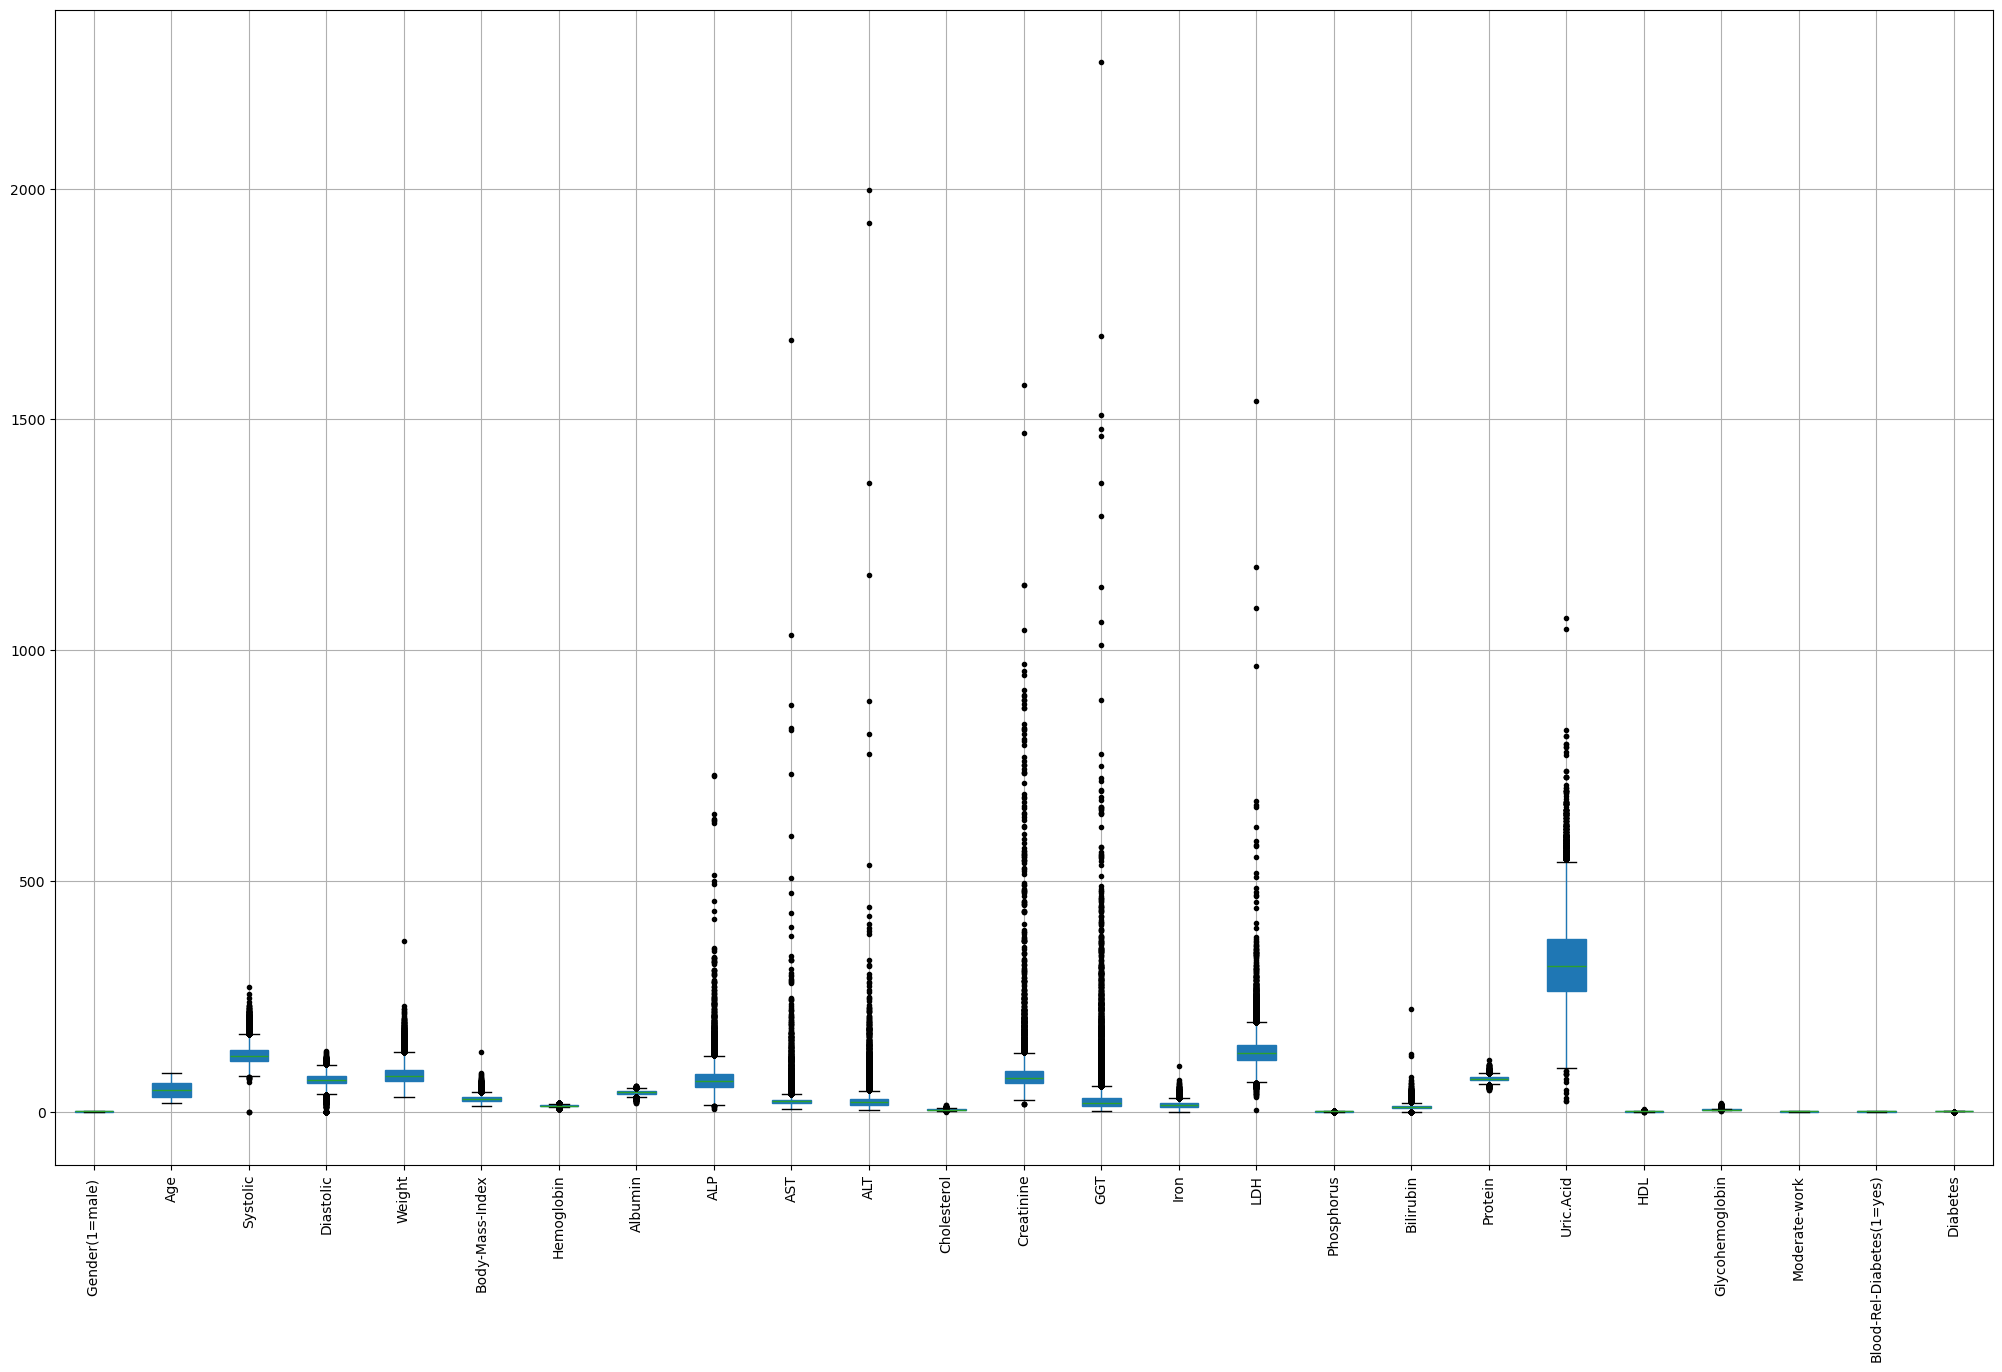

In [20]:
plt.subplots(figsize=(25,15))
data.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [21]:
minimum = 0
maximum = 0

def detect_outlier(feature):
    first_q = np.percentile(feature, 25)
    third_q = np.percentile(feature, 75) 
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR
    flag = False
    
    if(minimum > np.min(feature)):
        flag = True
    if(maximum < np.max(feature)):
        flag = True
    
    return flag

In [22]:
def  remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    """
    # any value beyond the acceptance range are considered
    as outliers. 
    # we replace the outliers with the median value of that 
      feature.
    """
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median

# taking all the columns except the last one
# last column is the label

X = data.iloc[:, :-1]
for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

In [23]:
X = data.iloc[:, :-1]

In [24]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

Systolic Contains Outlier
Diastolic Contains Outlier
Weight Contains Outlier
Body-Mass-Index Contains Outlier
Hemoglobin Contains Outlier
Albumin Contains Outlier
ALP Contains Outlier
AST Contains Outlier
ALT Contains Outlier
Cholesterol Contains Outlier
Creatinine Contains Outlier
GGT Contains Outlier
Iron Contains Outlier
LDH Contains Outlier
Phosphorus Contains Outlier
Bilirubin Contains Outlier
Protein Contains Outlier
Uric.Acid Contains Outlier
HDL Contains Outlier
Glycohemoglobin Contains Outlier


In [25]:
for i in range (50):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 [Text(1, 0, 'Gender(1=male) '),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Systolic'),
  Text(4, 0, 'Diastolic'),
  Text(5, 0, 'Weight'),
  Text(6, 0, 'Body-Mass-Index'),
  Text(7, 0, 'Hemoglobin'),
  Text(8, 0, 'Albumin'),
  Text(9, 0, 'ALP'),
  Text(10, 0, 'AST'),
  Text(11, 0, 'ALT'),
  Text(12, 0, 'Cholesterol'),
  Text(13, 0, 'Creatinine'),
  Text(14, 0, 'GGT'),
  Text(15, 0, 'Iron'),
  Text(16, 0, 'LDH'),
  Text(17, 0, 'Phosphorus'),
  Text(18, 0, 'Bilirubin'),
  Text(19, 0, 'Protein'),
  Text(20, 0, 'Uric.Acid'),
  Text(21, 0, 'HDL'),
  Text(22, 0, 'Glycohemoglobin'),
  Text(23, 0, 'Moderate-work'),
  Text(24, 0, 'Blood-Rel-Diabetes(1=yes)')])

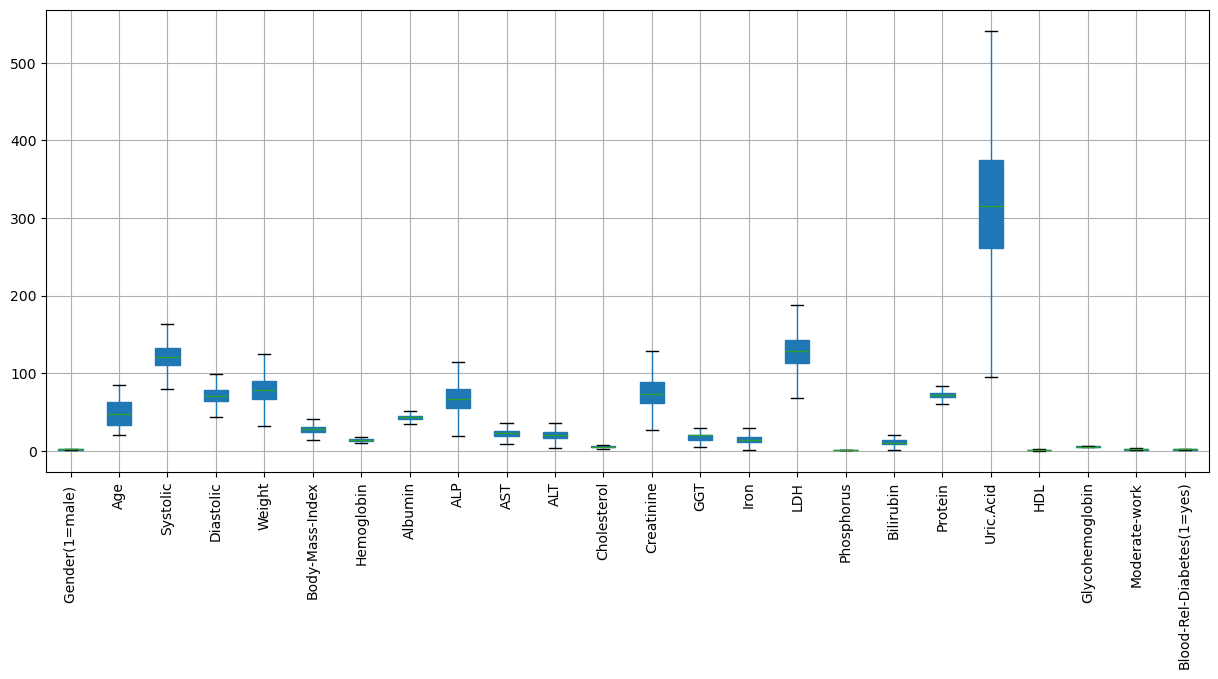

In [26]:
plt.subplots(figsize=(15,6))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [27]:
for i in range(len(X.columns)):
    if(detect_outlier(X[X.columns[i]])):
        print(X.columns[i], "Contains Outlier")

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
scaled_df.head()

,Gender(1=male),Age,Systolic,Diastolic,Weight,Body-Mass-Index,Hemoglobin,Albumin,ALP,AST,...,Iron,LDH,Phosphorus,Bilirubin,Protein,Uric.Acid,HDL,Glycohemoglobin,Moderate-work,Blood-Rel-Diabetes(1=yes)
0,-1.026927,1.557803,-1.550529,-1.364841,-0.200522,-0.594546,-0.059104,0.726296,-0.309102,-0.790869,...,-0.630587,0.501804,-0.794259,0.243672,-0.000498,0.551461,0.177571,-2.261760,2.740933,0.905444
1,-1.026927,0.003128,0.020931,1.166823,0.809160,0.228165,0.219442,0.726296,-0.252824,-0.174965,...,1.813833,0.188553,-0.989929,-0.661559,0.219406,1.070389,-0.715435,0.338547,-1.171490,0.905444
2,-1.026927,-0.663161,-0.044546,2.667068,1.204766,0.525908,1.263992,1.374143,-0.252824,-1.201472,...,-0.630587,0.099053,-0.414776,-1.140799,-0.000498,0.255286,-1.003501,-0.636568,-1.171490,-1.104431
3,-1.026927,1.169134,0.544751,-0.427187,-0.897262,-0.463304,1.821085,-0.893321,1.998322,0.235638,...,-0.464676,2.336562,-1.754823,-0.661559,-1.319924,1.143811,-0.139302,0.013509,2.740933,-1.104431
4,-1.026927,1.779899,0.937616,-0.896014,-0.194617,-0.118549,1.681812,0.726296,2.392272,0.030336,...,-0.531040,0.949306,-0.989929,-0.208944,1.538832,0.626127,-0.830661,1.313662,-1.171490,0.905444


In [30]:
label = data["Diabetes"]

In [31]:
encoder = LabelEncoder()
label = encoder.fit_transform(label)

In [32]:
X = scaled_df
y = label 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [33]:
print(X_train.shape, y_test.shape)
print(y_train.shape, y_test.shape)

(29663, 24) (7416,)
(29663,) (7416,)


In [34]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

xnew2=SelectKBest(f_classif, k=20).fit_transform(X, y)

In [35]:
 import sklearn.feature_selection as fs
 import matplotlib.pyplot as plt
 df2 = fs.SelectKBest(k='all')

 df2.fit(X, y)

 names = X.columns.values[df2.get_support()]

 scores = df2.scores_[df2.get_support()]

 names_scores = list(zip(names, scores))

 ns_df = pd.DataFrame(data = names_scores, columns=

  ['Features','F_Scores'])

 ns_df_sorted = ns_df.sort_values(['F_Scores','Features'], ascending =

  [False, True])

 print(ns_df_sorted)

                     Features     F_Scores
1                         Age  2686.409705
23  Blood-Rel-Diabetes(1=yes)  1536.785191
5             Body-Mass-Index  1000.670115
2                    Systolic   766.368625
4                      Weight   526.900940
7                     Albumin   525.811066
21            Glycohemoglobin   477.417483
20                        HDL   378.750379
11                Cholesterol   334.923024
13                        GGT   305.472574
6                  Hemoglobin   270.428079
14                       Iron   211.216877
22              Moderate-work   188.266414
8                         ALP   156.172300
19                  Uric.Acid   144.722845
12                 Creatinine   102.880413
17                  Bilirubin    80.463331
3                   Diastolic    63.316044
15                        LDH    49.826302
10                        ALT    27.645892
9                         AST    22.682305
0             Gender(1=male)     12.219556
18         

Best parameters : {'class_weight': {0: 0.5236842105263158, 1: 0.47631578947368425}}


<Axes: xlabel='weight'>

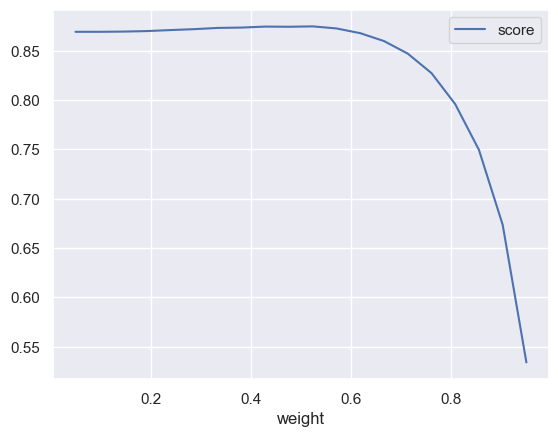

In [36]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='accuracy',
    cv=10
)
grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

              precision    recall  f1-score   support

           0       0.30      0.76      0.43       951
           1       0.95      0.73      0.83      6465

    accuracy                           0.74      7416
   macro avg       0.62      0.75      0.63      7416
weighted avg       0.87      0.74      0.78      7416



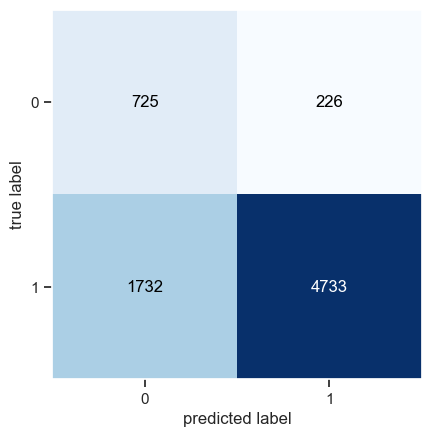

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from matplotlib import pyplot as plt
lr = LogisticRegression(class_weight='balanced',random_state=420)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

              precision    recall  f1-score   support

           0       0.35      0.76      0.48       951
           1       0.96      0.80      0.87      6465

    accuracy                           0.79      7416
   macro avg       0.65      0.78      0.67      7416
weighted avg       0.88      0.79      0.82      7416



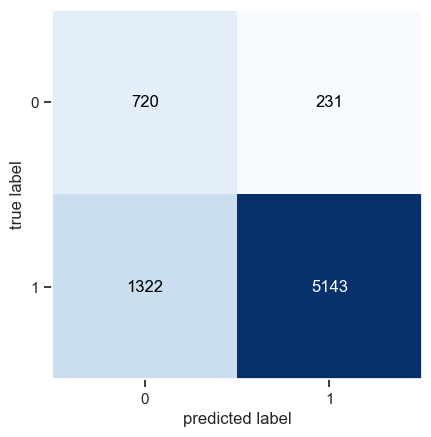

In [38]:
from sklearn.svm import SVC

clf_svc_rbf = SVC(kernel="rbf",class_weight='balanced',random_state=4200)
clf_svc_rbf.fit(X_train,y_train)
y_pred_clf_svc_rbf = clf_svc_rbf.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_clf_svc_rbf)

print(classification_report(y_test, y_pred_clf_svc_rbf))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_clf_svc_rbf))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_clf_svc_rbf)
roc_auc = auc(false_positive_rate, true_positive_rate)

              precision    recall  f1-score   support

           0       0.69      0.27      0.39       951
           1       0.90      0.98      0.94      6465

    accuracy                           0.89      7416
   macro avg       0.80      0.63      0.67      7416
weighted avg       0.87      0.89      0.87      7416



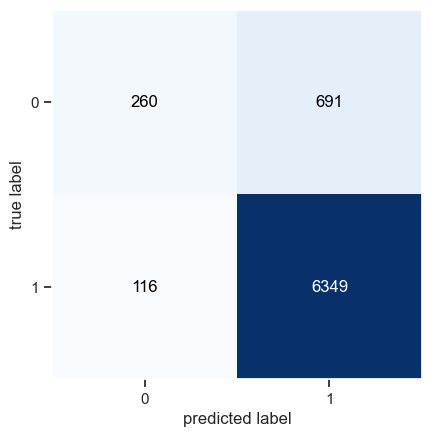

In [39]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier(class_weight='balanced',random_state=4200)
rd.fit(X_train,y_train)
y_pred_rd = rd.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_rd)

print(classification_report(y_test,y_pred_rd))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rd))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rd)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [40]:
#svm
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

class_weight='balanced'
model = SVC(kernel='rbf', C=1, class_weight=class_weight)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.7827 (0.0041)


array([0.78141855, 0.778452  , 0.78829558])

In [41]:
#LR
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
class_weight='balanced'

model = LogisticRegression(class_weight=class_weight)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.7353 (0.0032)


array([0.73840345, 0.73085221, 0.73678533])

In [42]:
#RF
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

class_weight='balanced'
model = RandomForestClassifier(class_weight=class_weight)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.8910 (0.0022)


array([0.89252967, 0.89266451, 0.88794498])

In [43]:
#DT
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(class_weight=class_weight)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.4f (%.4f)' % (mean(scores), std(scores)))
scores

Accuracy: 0.8507 (0.0027)


array([0.84816613, 0.84951456, 0.85436893])

In [44]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    max_depth=5,
    n_estimators=50,
    random_state=42,
    eval_metric='auc'
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

[0]	validation_0-auc:0.87062
[1]	validation_0-auc:0.87548
[2]	validation_0-auc:0.87702
[3]	validation_0-auc:0.87913
[4]	validation_0-auc:0.87969
[5]	validation_0-auc:0.87977
[6]	validation_0-auc:0.88107
[7]	validation_0-auc:0.88299
[8]	validation_0-auc:0.88417
[9]	validation_0-auc:0.88562
[10]	validation_0-auc:0.88553
[11]	validation_0-auc:0.88617
[12]	validation_0-auc:0.88630
[13]	validation_0-auc:0.88733
[14]	validation_0-auc:0.88771
[15]	validation_0-auc:0.88838
[16]	validation_0-auc:0.88898
[17]	validation_0-auc:0.88939
[18]	validation_0-auc:0.88982
[19]	validation_0-auc:0.89024
[20]	validation_0-auc:0.89048
[21]	validation_0-auc:0.89082
[22]	validation_0-auc:0.89179
[23]	validation_0-auc:0.89232
[24]	validation_0-auc:0.89292
[25]	validation_0-auc:0.89352
[26]	validation_0-auc:0.89388
[27]	validation_0-auc:0.89433
[28]	validation_0-auc:0.89439
[29]	validation_0-auc:0.89452
[30]	validation_0-auc:0.89467
[31]	validation_0-auc:0.89468
[32]	validation_0-auc:0.89480
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [45]:
predictions=model.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, predictions))

Accuracy Score:  0.8998112189859763


C:\Users\DELL\anaconda3\envs\tens\lib\site-packages\xgboost\core.py:158: UserWarning: [16:56:56] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.62      0.47      0.53       951
           1       0.92      0.96      0.94      6465

    accuracy                           0.90      7416
   macro avg       0.77      0.71      0.74      7416
weighted avg       0.89      0.90      0.89      7416



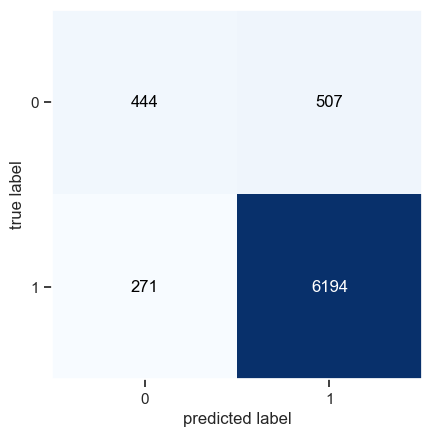

In [46]:
rd =  XGBClassifier(class_weight='balanced',random_state=4200)
rd.fit(X_train,y_train)
y_pred_rd = rd.predict(X_test)


import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred_rd)

print(classification_report(y_test,y_pred_rd))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rd))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rd)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [47]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [48]:
classifier=Sequential()
classifier.add(Dense(units=256, kernel_initializer='uniform',activation='relu',input_dim=24))
classifier.add(Dense(units=128, kernel_initializer='uniform',activation='relu'))
classifier.add(Dropout(rate=0.5))
classifier.add(Dense(units=64, kernel_initializer='uniform',activation='relu'))
classifier.add(Dropout(rate=0.4))
classifier.add(Dense(units=32, kernel_initializer='uniform',activation='relu'))

classifier.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [49]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y_train)

class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

class_weight = {classes[i]: class_weights[i] for i in range(len(classes))}
classifier.fit(X_train, y_train, batch_size=10, epochs=100, class_weight=class_weight, validation_data=(X_test, y_test))

Epoch 1/100
2967/2967 [==============================] - 16s 5ms/step - loss: 0.5060 - accuracy: 0.7526 - val_loss: 0.4350 - val_accuracy: 0.7998
Epoch 2/100
2967/2967 [==============================] - 14s 5ms/step - loss: 0.4618 - accuracy: 0.8026 - val_loss: 0.5227 - val_accuracy: 0.7782
Epoch 3/100
2967/2967 [==============================] - 12s 4ms/step - loss: 0.4451 - accuracy: 0.8148 - val_loss: 0.4322 - val_accuracy: 0.8081
Epoch 4/100
2967/2967 [==============================] - 13s 4ms/step - loss: 0.4324 - accuracy: 0.8264 - val_loss: 0.5036 - val_accuracy: 0.8131
Epoch 5/100
2967/2967 [==============================] - 12s 4ms/step - loss: 0.4240 - accuracy: 0.8278 - val_loss: 0.4399 - val_accuracy: 0.8329
Epoch 6/100
2967/2967 [==============================] - 12s 4ms/step - loss: 0.4118 - accuracy: 0.8373 - val_loss: 0.3945 - val_accuracy: 0.8281
Epoch 7/100
2967/2967 [==============================] - 12s 4ms/step - loss: 0.4093 - accuracy: 0.8421 - val_loss: 0.4778 -

In [50]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,auc,f1_score
y_pred = classifier.predict(X_test)>0.9

import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

232/232 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.29      0.78      0.42       951
           1       0.96      0.72      0.82      6465

    accuracy                           0.72      7416
   macro avg       0.62      0.75      0.62      7416
weighted avg       0.87      0.72      0.77      7416



0.7478265642954907

AUC Score: 0.7478265642954907


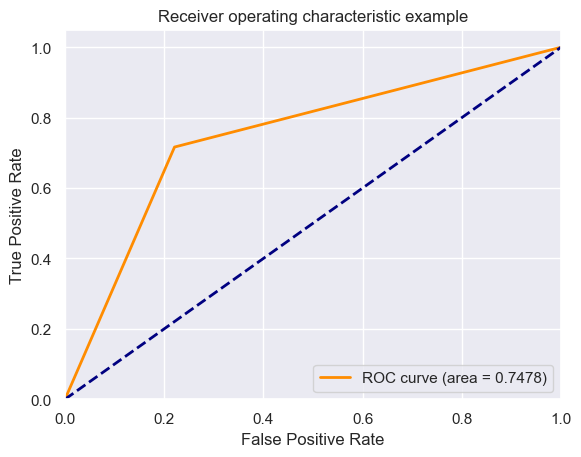

In [51]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

fpr , tpr , thresholds = roc_curve ( y_test , y_pred)
auc_keras = auc(fpr, tpr)
print("AUC Score:",auc_keras)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % auc_keras)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [52]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [53]:
clf1 = SVC(kernel='rbf', C=1, class_weight=class_weight,random_state=42)
clf2 = LogisticRegression(class_weight=class_weight,random_state=42)
clf3 = RandomForestClassifier(class_weight=class_weight,random_state=42)
clf4 = DecisionTreeClassifier(class_weight=class_weight,random_state=42)

In [54]:
eclf = VotingClassifier( estimators=[('svm', clf1), ('lr', clf2), ('rf', clf3), ('dt',clf4)],
     voting='hard')

In [55]:
import pickle

# Save the trained model
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("XGBoost model saved successfully as 'xgboost_model.pkl'!")


XGBoost model saved successfully as 'xgboost_model.pkl'!


In [56]:
import pickle

# Load the model
with open('xgboost_model.pkl', 'rb') as f:
    model = pickle.load(f)

print("XGBoost model loaded successfully!")

# Example: Use the model for predictions
y_pred = model.predict(X_test)


XGBoost model loaded successfully!


In [57]:
import numpy as np

# Define the important features
important_features = ['Age', 'Systolic', 'Diastolic', 'BMI', 'Cholesterol', 'Glycohemoglobin', 'Blood-Rel-Diabetes(1=yes)']

# Example input (Modify values based on real user input)
input_data = np.array([[45, 130, 85, 25.6, 200, 6.5, 1]])  # Example values

# Predict using the model
prediction = model.predict(input_data)

# Display result
if prediction[0] == 1:
    print("The person is at risk of having diabetes.")
else:
    print("The person is not at risk of having diabetes.")


ValueError: Feature shape mismatch, expected: 24, got 7

In [59]:
important_features = ['Age', 'Systolic', 'Diastolic', 'Body-Mass-Index', 'Cholesterol', 'Glycohemoglobin', 'Blood-Rel-Diabetes(1=yes)']
X_train = X_train[important_features]
X_test = X_test[important_features]


In [60]:
import numpy as np

# Example input for the 7 important features
input_data = [45, 130, 85, 25.6, 200, 6.5, 1]

# Fill the rest with zeros (assuming 24 features are needed)
full_input_data = np.zeros((1, 24))
full_input_data[0, :7] = input_data  # Fill first 7 values

# Predict using the model
prediction = model.predict(full_input_data)

# Display result
if prediction[0] == 1:
    print("The person is at risk of having diabetes.")
else:
    print("The person is not at risk of having diabetes.")


The person is at risk of having diabetes.


In [61]:
import numpy as np
import pickle

# Load the trained XGBoost model
with open('xgboost_model.pkl', 'rb') as f:
    model = pickle.load(f)

print("Model loaded successfully!")

# Example input (Low-Risk Person)
input_data = np.array([[30, 120, 80, 22.5, 170, 4.8, 0]])  # Example values

# Predict using the model
prediction = model.predict(input_data)

# Display result
if prediction[0] == 1:
    print("The person is at risk of having diabetes.")
else:
    print("The person is NOT at risk of having diabetes.")


Model loaded successfully!


ValueError: Feature shape mismatch, expected: 24, got 7